# Study Case Clustering

## 1. Import Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
data_customer = pd.read_csv('shopping_data.csv')
data_customer.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data_customer.shape

(200, 5)

Saya akan menggunakan **Annual Income** dan **Spending Score (1-100)** untuk melakukan clustering

## 2. Plot Data

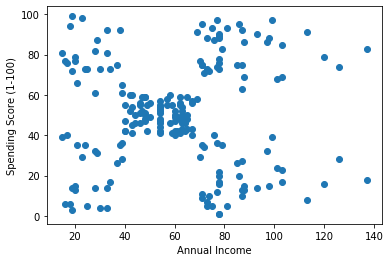

In [6]:
plt.scatter(data_customer['Annual Income (k$)'], data_customer['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel ('Spending Score (1-100)')
plt.show()

## 3. Modelling

In [7]:
X = data_customer[['Annual Income (k$)', 'Spending Score (1-100)']]

### 3.1 K-Means

#### 3.1.1 Elbow Method

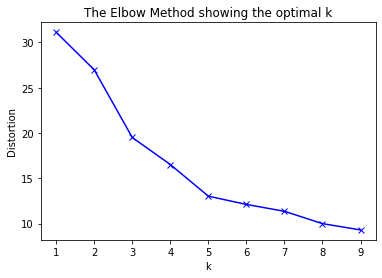

In [8]:
distortions = []
K = range (1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'),axis=1))/ X.shape[0])

# plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

berdasarkan elbow method, cluster optimal adalah 3 cluster

#### 3.1.2 Fit and Predict

In [9]:
model_kme = KMeans(n_clusters= 3)

In [10]:
model_kme.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
pred_kme = model_kme.predict(X)

In [12]:
pred_kme

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

#### 3.1.3 Visualization

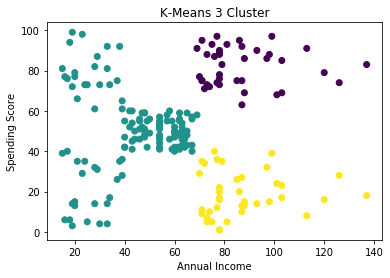

In [13]:
plt.tight_layout()
plt.scatter(data_customer['Annual Income (k$)'], data_customer['Spending Score (1-100)'], c = pred_kme) 
#c itu adalah color dan kita ambil berdasarkan predictnya
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means 3 Cluster')

plt.show()

### 3.2 DB-SCAN (without scaling)

In [31]:
model_dbs = DBSCAN(eps=5, min_samples=5)

In [32]:
model_dbs.fit_predict(X)

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2, -1,  4, -1,  4, -1,
        2, -1,  4,  3,  2,  3,  2, -1,  4, -1,  4, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [33]:
labels = model_dbs.labels_
labels

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2, -1,  4, -1,  4, -1,
        2, -1,  4,  3,  2,  3,  2, -1,  4, -1,  4, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [34]:
n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
n_clusters_

5

#### Visualization

In [35]:
X = X.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [52]:
core_samples_mask = np.zeros_like(model_dbs.labels_, dtype=bool)
core_samples_mask[model_dbs.core_sample_indices_] = True
core_samples_mask

array([False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,

In [37]:
unique_labels = set(labels)

In [38]:
colors = [plt.cm.Spectral(each)
    for each in np.linspace(0, 1, len(unique_labels))]

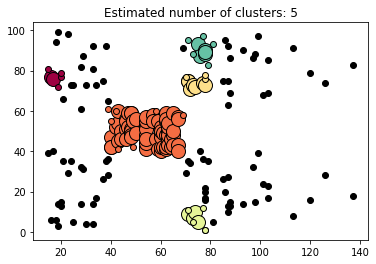

In [43]:
for k, col in zip (unique_labels, colors):
    if k == -1:
        
            # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',
        markerfacecolor=tuple(col), markeredgecolor='k',
        markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',
        markerfacecolor=tuple(col),
        markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### 3.3 Hierarchical Clustering

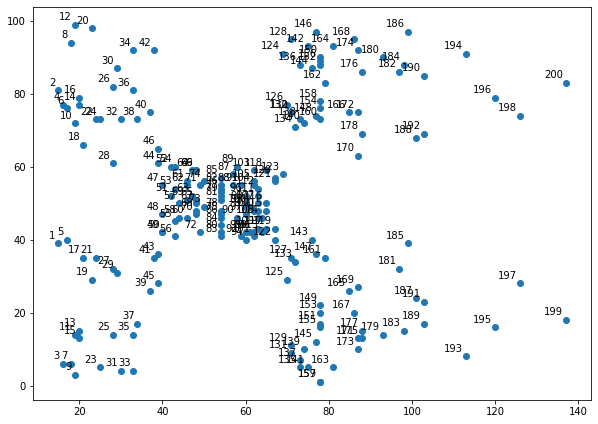

In [53]:
labels = range(1, len(X)+1)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0], X[:, 1], label= 'True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = 
    (-3,3),textcoords='offset points', ha='right',
    va='bottom')
    
plt.show()

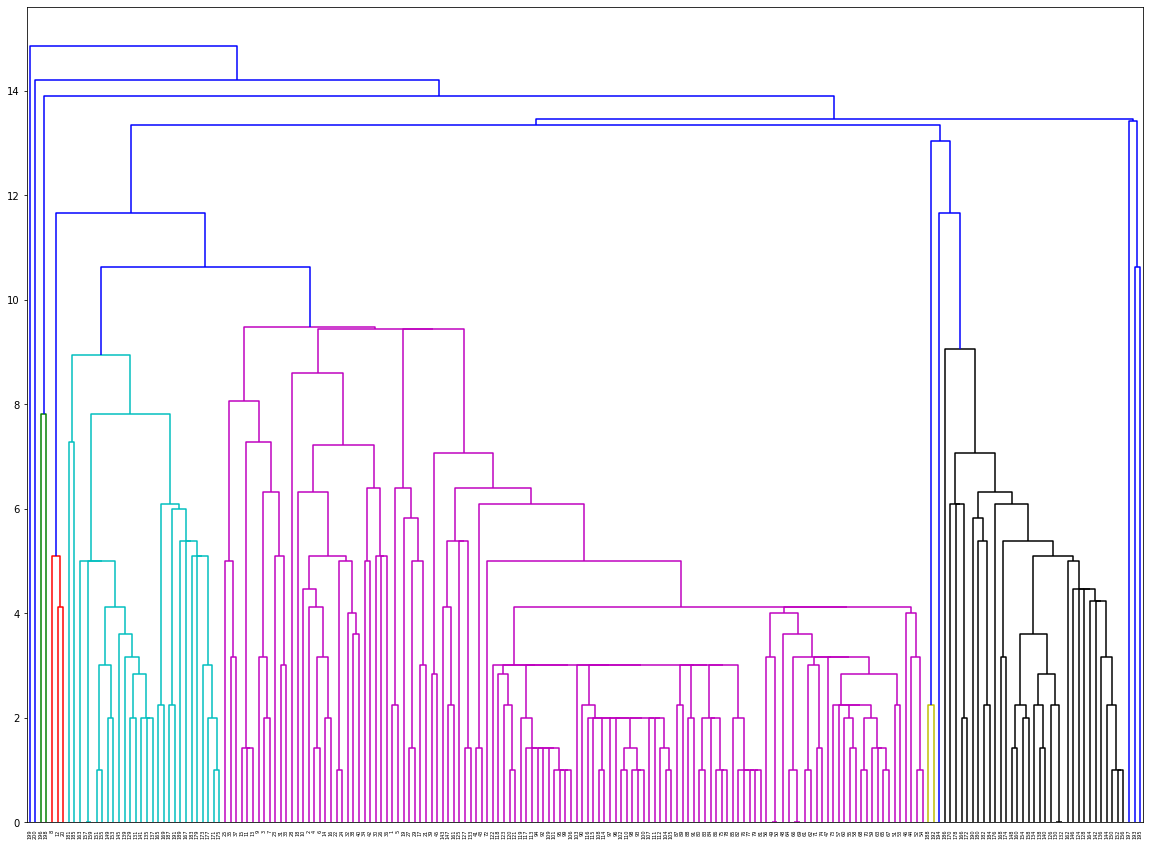

In [61]:
linked = linkage(X, 'single') 

labelList = range(1, len(X)+1)

plt.figure(figsize=(20, 15))
dendrogram(linked, orientation='top',
          labels=labelList,
          distance_sort='descending',
          show_leaf_counts=True)

plt.show()

## 4. Conclusion

Dari data di atas kita bisa lihat bahwa orang dengan annual income yang besar cenderung belanja lebih banyak, tetapi tidak sedikit pula yang memiliki annual income besar malah belanja sedikit. Orang dengan annual income di antara 40-60 juga memiliki karakteristik yang sama yaitu spending scorenya juga disekitar 40-60